<a href="https://colab.research.google.com/github/Chutki319239/ELEVATE-AI-ML-task1-data-preprocessing/blob/main/ElevateAI_ML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
sns.set_style('whitegrid')
%matplotlib inline


In [15]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print("Shape:", df.shape)
display(df.info())
display(df.describe())
print("Missing values:\n", df.isnull().sum())

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


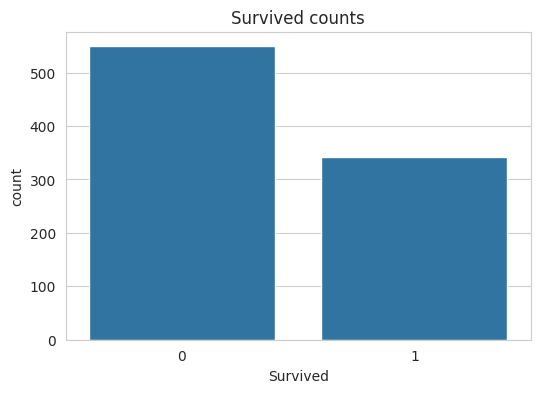

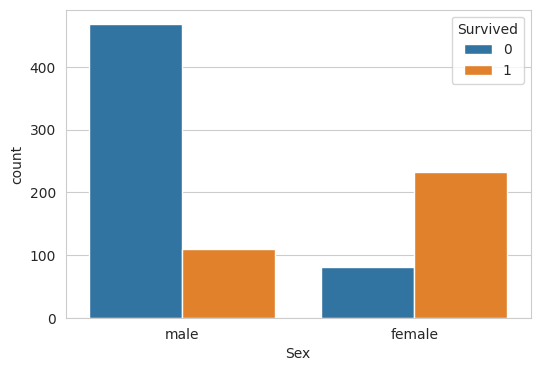

In [17]:
#Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survived counts')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

In [18]:
# --- 5. Feature engineering & missing-value handling ---
# 5.1 HasCabin
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# 5.2 Fill Embarked and Fare (if any)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# 5.3 Extract Title from Name and group rare titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

# 5.4 Impute Age by median age of Title groups
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# If still null (rare case), fill with overall median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 5.5 Family features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3203028828.py:10: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipython-input-3203028828.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-3203028828.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assi

In [19]:
# --- 6. Encoding categorical variables ---
# Sex -> 0/1
df['Sex'] = df['Sex'].map({'male':0,'female':1})

# One-hot for Embarked and Title (drop_first to avoid dummy trap)
df = pd.get_dummies(df, columns=['Embarked','Title'], drop_first=True)

# Drop useless cols
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)


In [20]:
# --- 7. Feature scaling (standardization) ---
from sklearn.preprocessing import StandardScaler
num_features = ['Age','Fare','FamilySize']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


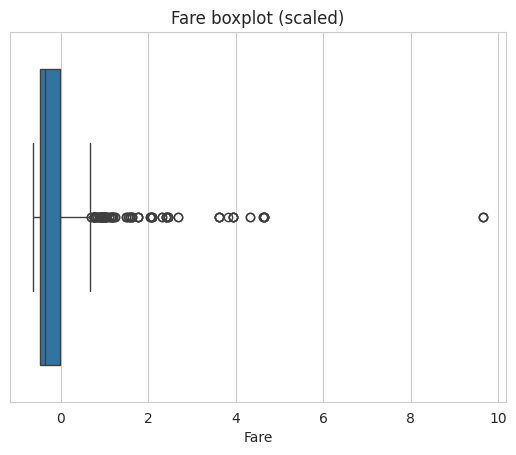

After outlier removal shape: (775, 16)


In [21]:
# --- 8. Outlier detection & removal (IQR method example on Fare) ---
plt.figure()
sns.boxplot(x=df['Fare'])
plt.title('Fare boxplot (scaled)')
plt.show()

# remove extreme Fare outliers (optional)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df['Fare'] < (Q1 - 1.5*IQR)) | (df['Fare'] > (Q3 + 1.5*IQR)))
df = df[mask].reset_index(drop=True)
print("After outlier removal shape:", df.shape)


In [22]:
# --- 9. Save cleaned dataset ---
df.to_csv('titanic_cleaned.csv', index=False)
print("Saved titanic_cleaned.csv")


Saved titanic_cleaned.csv


In [23]:
# --- 10. Quick model (to confirm preprocessing helped) ---
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.8144329896907216
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       128
           1       0.75      0.68      0.71        66

    accuracy                           0.81       194
   macro avg       0.80      0.78      0.79       194
weighted avg       0.81      0.81      0.81       194

